In [12]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

In [13]:
df = pd.read_csv(r"D:\AI\008_NED_Machine_Learning\data\014-Advertising(Regression Model).csv")
df.head()

,Unnamed: 0,TV,Radio,Newspaper,Sales
0,1,230.1,37.8,69.2,22.1
1,2,44.5,39.3,45.1,10.4
2,3,17.2,45.9,69.3,9.3
3,4,151.5,41.3,58.5,18.5
4,5,180.8,10.8,58.4,12.9


In [14]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  200 non-null    int64  
 1   TV          200 non-null    float64
 2   Radio       200 non-null    float64
 3   Newspaper   200 non-null    float64
 4   Sales       200 non-null    float64
dtypes: float64(4), int64(1)
memory usage: 7.9 KB


In [15]:
df.shape

(200, 5)

In [16]:
df.describe()

,Unnamed: 0,TV,Radio,Newspaper,Sales
count,200.000000,200.000000,200.000000,200.000000,200.000000
mean,100.500000,147.042500,23.264000,30.554000,14.022500
std,57.879185,85.854236,14.846809,21.778621,5.217457
min,1.000000,0.700000,0.000000,0.300000,1.600000
25%,50.750000,74.375000,9.975000,12.750000,10.375000
50%,100.500000,149.750000,22.900000,25.750000,12.900000
75%,150.250000,218.825000,36.525000,45.100000,17.400000
max,200.000000,296.400000,49.600000,114.000000,27.000000


In [17]:
df.isnull().sum() 

Unnamed: 0    0
TV            0
Radio         0
Newspaper     0
Sales         0
dtype: int64

In [18]:
df.sample(5)    

,Unnamed: 0,TV,Radio,Newspaper,Sales
178,179,276.7,2.3,23.7,11.8
142,143,220.5,33.2,37.9,20.1
137,138,273.7,28.9,59.7,20.8
61,62,261.3,42.7,54.7,24.2
186,187,139.5,2.1,26.6,10.3


In [19]:
df.tail()

,Unnamed: 0,TV,Radio,Newspaper,Sales
195,196,38.2,3.7,13.8,7.6
196,197,94.2,4.9,8.1,9.7
197,198,177.0,9.3,6.4,12.8
198,199,283.6,42.0,66.2,25.5
199,200,232.1,8.6,8.7,13.4


In [20]:
X= df.drop(['Sales'], axis=1)
y = df['Sales']

In [22]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [23]:
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

In [25]:
y_pred = model.predict(X_test)
y_pred

array([16.41227699, 20.84319293, 21.51186915, 10.65309994, 22.12405753,
       13.12383506, 21.03748883,  7.50385439, 13.64787029, 15.12040886,
        9.02055551,  6.70666642, 14.40155146,  8.88609041,  9.74353333,
       12.21551975,  8.71370868, 16.2941451 , 10.26802337, 18.80498245,
       19.58864662, 13.22318303, 12.3647867 , 21.31473607,  7.79734749,
        5.78189965, 20.74934811, 11.95476656,  9.199109  ,  8.52178704,
       12.40431294,  9.94865202, 21.36880272, 12.25374832, 18.29943527,
       20.13347356, 14.07464638, 20.88594679, 11.05214979,  4.55168744])

In [26]:
pd.DataFrame({'y_test':y_test,'y_predict':y_pred})


,y_test,y_predict
95,16.9,16.412277
15,22.4,20.843193
30,21.4,21.511869
158,7.3,10.653100
128,24.7,22.124058
115,12.6,13.123835
69,22.3,21.037489
170,8.4,7.503854
174,11.5,13.647870
45,14.9,15.120409


In [27]:
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)

In [28]:
print(f"Mean Squared Error (MSE): {mse:.2f}")
print(f"Root Mean Squared Error (RMSE): {rmse:.2f}")
print(f"R-squared (R2): {r2:.2f}")

Mean Squared Error (MSE): 3.20
Root Mean Squared Error (RMSE): 1.79
R-squared (R2): 0.90


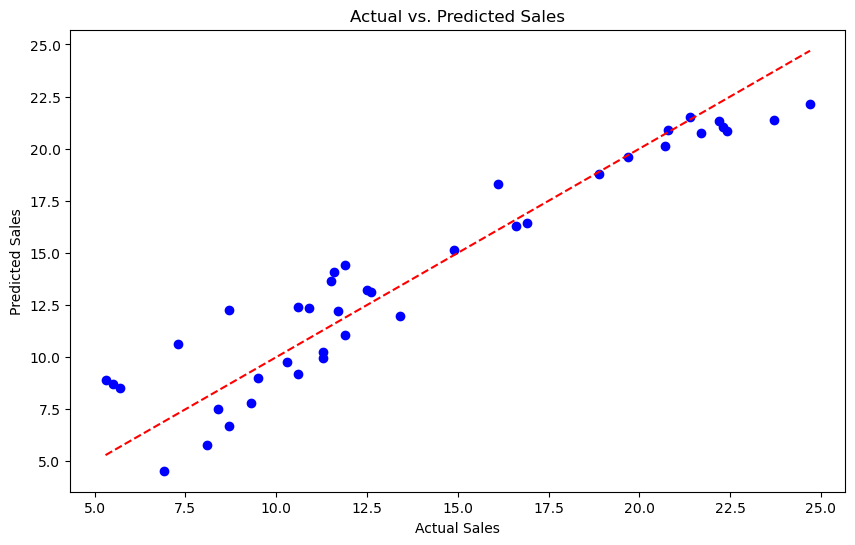

In [29]:
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred, color='blue')
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='red', linestyle='--')
plt.title('Actual vs. Predicted Sales')
plt.xlabel('Actual Sales')
plt.ylabel('Predicted Sales')
plt.show()

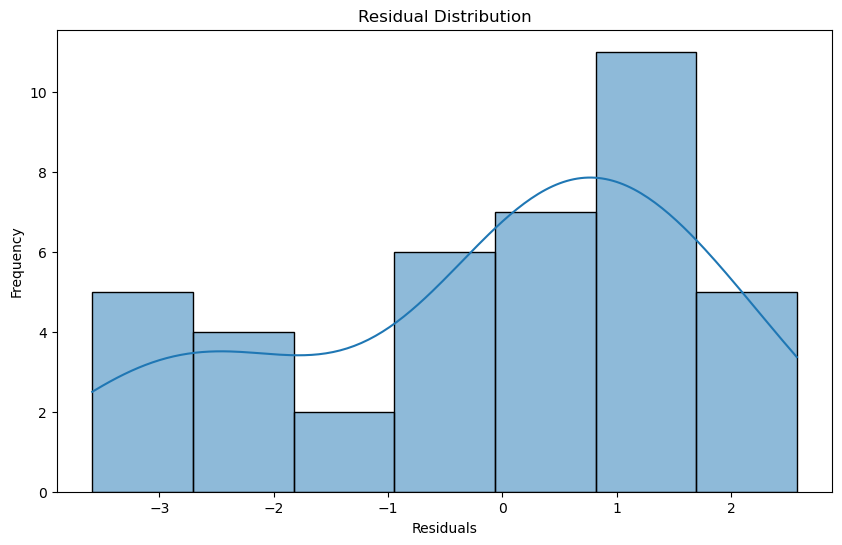

In [30]:
residuals = y_test - y_pred
plt.figure(figsize=(10, 6))
sns.histplot(residuals, kde=True)
plt.title('Residual Distribution')
plt.xlabel('Residuals')
plt.ylabel('Frequency')
plt.show()

In [31]:
coefficients = pd.DataFrame({
    'Feature': ['Intercept'] + list(X.columns),
    'Coefficient': [model.intercept_] + list(model.coef_)
})
print(coefficients)

      Feature  Coefficient
0   Intercept     2.906527
1  Unnamed: 0     0.000644
2          TV     0.044718
3       Radio     0.189251
4   Newspaper     0.003046
